## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.
Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
* Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

In [1]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
# %matplotlib inline
# import numpy as np
# import seaborn as sns
# from my_keys import *
# import warnings
# warnings.filterwarnings('ignore')
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)
import json

In [2]:
# Setup Tweepy API Authentication# Setup T 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Pull one user tweet and display
test = "BBCWorld"
test_tweet = api.user_timeline(test)
# print a single tweet json for reference
print(json.dumps(test_tweet[0], sort_keys=True, indent=4))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Tue Sep 04 19:28:15 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "bbc.in/2wFOnEY",
                "expanded_url": "https://bbc.in/2wFOnEY",
                "indices": [
                    61,
                    84
                ],
                "url": "https://t.co/wtADwsqGWK"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 48,
    "favorited": false,
    "geo": null,
    "id": 1037059788704829441,
    "id_str": "1037059788704829441",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_status": false,
    "lang": "en",
    "place": null,
    "possibly_sensitive": false,
    "retweet_count": 27,
    "retweeted": false,
    "source": "<a href

In [4]:
#Sentiment Intensitiy Analyzer
analyzer = SentimentIntensityAnalyzer()

# Target Search Term
target_user = ["@BBC","@CBS","@Fox","@CNN","@nytimes"]

# Variables for holding sentiments
sentiments = []
# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
   # Loop through all targeted media tweets
    for target in target_user:
        # Get all tweets from home feed
        public_tweets = api.user_timeline(target)
        # Loop through all tweets 
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]     
            # Add each value to the appropriate list
            sentiments.append({"Date": tweet["created_at"],
                               "Screen_Name": tweet['user']['screen_name'],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg})
# print(json.dumps(public_tweets, indent=4, sort_keys=True))

In [5]:
#Generated dataframe containing sentiment for Media Sources
news_media_df1 = pd.DataFrame(sentiments).set_index("Screen_Name").round(3) 
news_media_df = pd.DataFrame(sentiments) 

#display head of news_media_df 
news_media_df1.head()

,Compound,Date,Negative,Neutral,Positive
Screen_Name,,,,,
BBC,0.000,Tue Sep 04 19:31:06 +0000 2018,1.000,0.000,0.000
BBC,0.905,Tue Sep 04 19:03:06 +0000 2018,0.615,0.000,0.385
BBC,-0.120,Tue Sep 04 18:32:01 +0000 2018,0.593,0.212,0.195
BBC,-0.340,Tue Sep 04 18:06:10 +0000 2018,0.684,0.188,0.128
BBC,0.624,Tue Sep 04 16:06:05 +0000 2018,0.786,0.000,0.214


In [6]:
#Save news_media_analysis as a csv titled, 'Sentiment_analyzer_Twitter.csv'.
news_media_df.to_csv('News_Mood_Twitter.csv',index=False)

In [7]:
#Generated dataframes for all the media sources
BBC_df = news_media_df[news_media_df['Screen_Name'] == 'BBC']
CBS_df = news_media_df[news_media_df['Screen_Name'] == 'CBS']
Fox_df = news_media_df[news_media_df['Screen_Name'] == 'fox']
CNN_df = news_media_df[news_media_df['Screen_Name'] == 'CNN']
NYtimes_df = news_media_df[news_media_df['Screen_Name'] == 'nytimes']

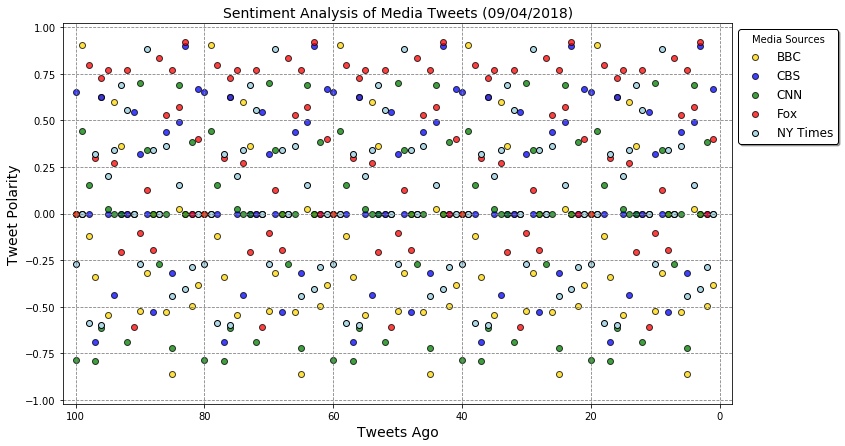

In [8]:
# Take the dataframe of the first media and return a truple of the value
# Evenly space the values
x_values = np.arange(1,BBC_df.shape[0]+1)
# Reverse the value for the plot to go from 100 to 0
x_axis = x_values[::-1]
# Set plot figure size
plt.figure(figsize=(12,7))
# x value will be 100 to 1 and Y value will each medias derived compound value
# E.g: For BBC first scatter plot value will be <plt.scatter(100,0.624,edgecolors='black',label='BBC')>
plt.scatter(x_axis,BBC_df['Compound'],marker='o', facecolors='gold', edgecolors='black', label='BBC', alpha=0.75)
plt.scatter(x_axis,CBS_df['Compound'],marker='o', facecolors='blue', edgecolors='black', label="CBS", alpha=0.75)
plt.scatter(x_axis,CNN_df['Compound'],marker='o', facecolors='green', edgecolors='black', label='CNN', alpha=0.75)
plt.scatter(x_axis,Fox_df['Compound'],marker='o', facecolors='red', edgecolors='black', label='Fox', alpha=0.75)
plt.scatter(x_axis,NYtimes_df['Compound'],marker='o', facecolors='lightblue',edgecolors='black', label='NY Times')

plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'large', title='Media Sources', bbox_to_anchor=(1, 1))
plt.xlabel('Tweets Ago',fontsize='14')
plt.ylabel('Tweet Polarity',fontsize='14')
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Sentiment Analysis of Media Tweets ({})'.format(now),fontsize=(14))
plt.xlim(102,-2)
plt.ylim(-1.02, 1.02)
plt.grid(True, color='grey', linestyle='dashed')
# Save and show plot
plt.savefig("SentimentScatterPlot.png")
plt.show();

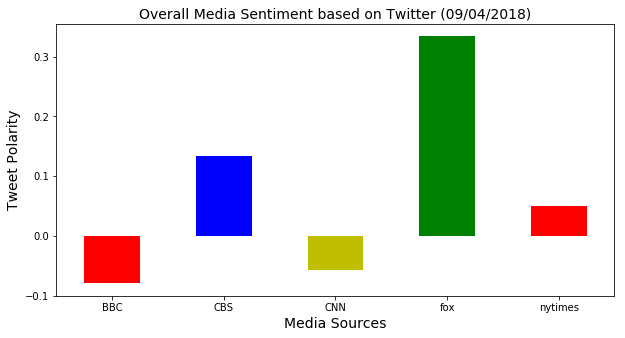

In [9]:
# Plot of overall Media Sentiment Analysis
plt.figure(figsize=(10,5))
news_media_df.groupby(["Screen_Name"])["Compound"].mean().plot(kind='bar',color=['r','b','y','g'])
plt.ylabel('Tweet Polarity',fontsize='14')
plt.xlabel('Media Sources',fontsize='14')
plt.xticks(rotation=0)
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Overall Media Sentiment based on Twitter ({})'.format(now),fontsize=(14))
# Save and show plot
plt.savefig("SentimentBarPlot.png")
plt.show();

In [10]:
# Derive the overall Media Sentiment grouping Twitter screen name with respective values
news_media_df_avg_compound = news_media_df.groupby(["Screen_Name"])["Compound"].mean().reset_index()
news_media_df_avg_neg = news_media_df.groupby(['Screen_Name'])['Negative'].mean().reset_index()
news_media_df_avg_pos = news_media_df.groupby(['Screen_Name'])['Positive'].mean().reset_index()
news_media_df_avg_neu = news_media_df.groupby(['Screen_Name'])['Neutral'].mean().reset_index()
# Rename the columns in above dataframe 
news_media_df_avg_compound.rename({'Screen_Name': 'Media Sources', 'Compound':  'Avg. Compound'},axis=1,inplace=True)
news_media_df_avg_neg.rename({'Screen_Name': 'Media Sources', 'Negative':'Avg. Negative'},axis=1,inplace=True)
news_media_df_avg_pos.rename({'Screen_Name': 'Media Sources', 'Positive': 'Avg. Positive'},axis=1,inplace=True)
news_media_df_avg_neu.rename({'Screen_Name': 'Media Sources', 'Neutral' :'Avg. Neutral'},axis=1,inplace=True)

In [11]:
# Merge all the average value dataframes into one for display
df_avg_sentiment_neg_pos = news_media_df_avg_neg.merge(news_media_df_avg_pos,how='outer',on='Media Sources')
df_avg_sentiment_neg_pos_neu = df_avg_sentiment_neg_pos.merge(news_media_df_avg_neu,how='outer',on='Media Sources')
df_avg_sentiment_neg_pos_neu_compound = df_avg_sentiment_neg_pos_neu.merge(news_media_df_avg_compound,how='outer',on='Media Sources')

# Display table
df_avg_sentiment_neg_pos_neu_compound

,Media Sources,Avg. Negative,Avg. Positive,Avg. Neutral,Avg. Compound
0,BBC,0.81305,0.07695,0.11005,-0.079535
1,CBS,0.88440,0.08305,0.03255,0.132900
2,CNN,0.84970,0.07320,0.07710,-0.056885
3,fox,0.78140,0.17335,0.04510,0.333850
4,nytimes,0.85820,0.07655,0.06525,0.049255


## Observable Trends for run date

1. BBC has the lowest positive polarity scores followed by CNN, compared to all other media sources
2. Overall Media Sentiment Analysis Plot, Fox appears to have the most positive compound tweets.
3. In the Sentiment Analysis of Media Tweets scatter plot, BBC rarly is in the neutral ground, meaning at 0.
